Задача классификации (classification) — задача, в которой мы пытаемся предсказать класс объекта на основе признаков в наборе данных. То есть задача сводится к предсказанию целевого признака, который является категориальным.

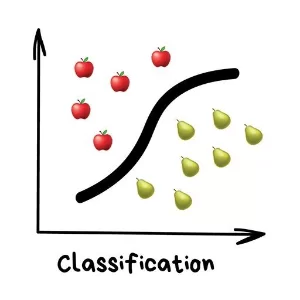

Бинарная - 2 призннака

Мультиклассовая (многоклассовая) - более двух признаков

Что вообще означает «решить задачу классификации»? Это значит построить разделяющую поверхность в пространстве признаков, которая делит пространство на части, каждая из которых соответствует определённому классу. 

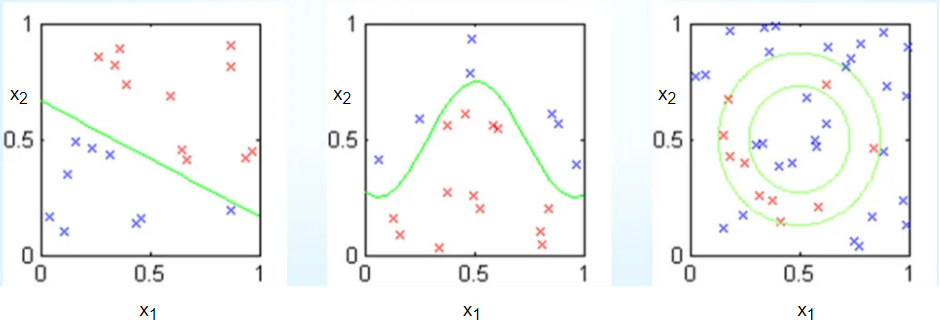

Модели, которые решают задачу классификации, называются классификаторами (classifier).

# ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

Логистическая регрессия (Logistic Regression) — одна из простейших моделей для решения задачи классификации. Несмотря на простоту, модель входит в топ часто используемых алгоритмов классификации в Data Science.

В основе логистической регрессии лежит логистическая функция (logistic function) σ(z) — отсюда и название модели. Однако более распространённое название этой функции — сигмόида (sigmoid). Записывается она следующим образом:

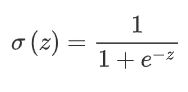

А вот график её зависимости от аргумента z:

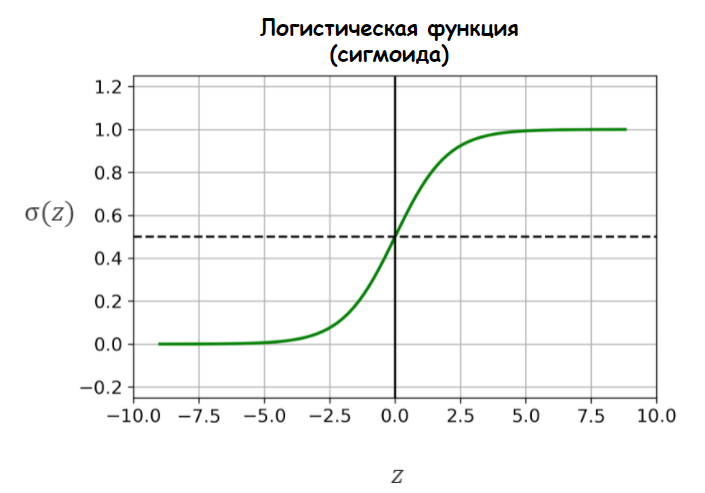

В чём преимущество этой функции?

У сигмоиды есть два очень важных для нас свойства:

Значения сигмоиды σ(z) лежат в диапазоне от 0 до 1 при любых значения аргумента z: какой бы z вы ни подставили, число меньше 0 или больше 1 вы не получите.
Сигмоида выдаёт значения σ(z) > 0.5 при её аргументе z > 0, σ(z) < 0.5 — при z < 0 и σ(z) = 0.5 — при z = 0.

Это ведь и есть свойства вероятности! Выходом сигмоиды является число от 0 до 1, которое можно интерпретировать как вероятность принадлежности к классу 1. Её мы и пытаемся предсказать.

Основная идея модели логистической регрессии: возьмём модель линейной регрессии (обозначим её выход за z):

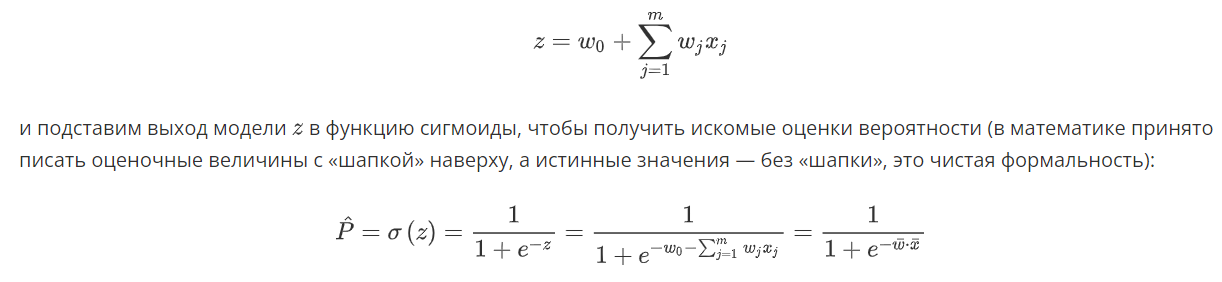

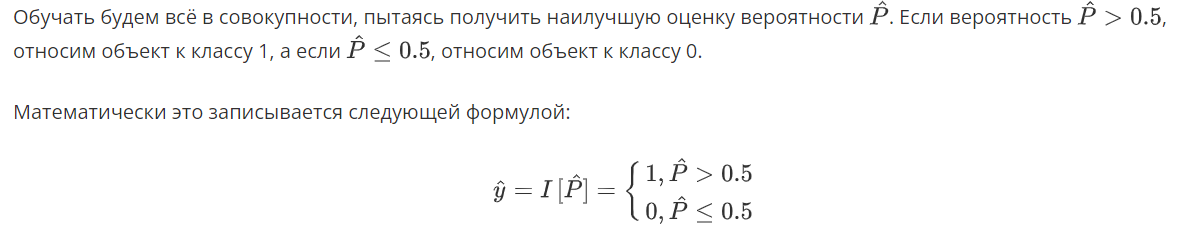

Если мы обучим модель, то есть подберём  коэффициенты w1, w2, w3...wm (как их найти, обсудим чуть позже) таким образом, что для объектов класса 1 модель линейной регрессии начнёт выдавать положительное число, а для класса 0 — выдавать отрицательное число, то тогда, подставив предсказание линейной регрессии z в сигмоиду, мы сможем получать вероятности принадлежности к каждому из классов в диапазоне от 0 до 1.

Далее по порогу вероятности мы сможем определять, к какому классу принадлежит объект.

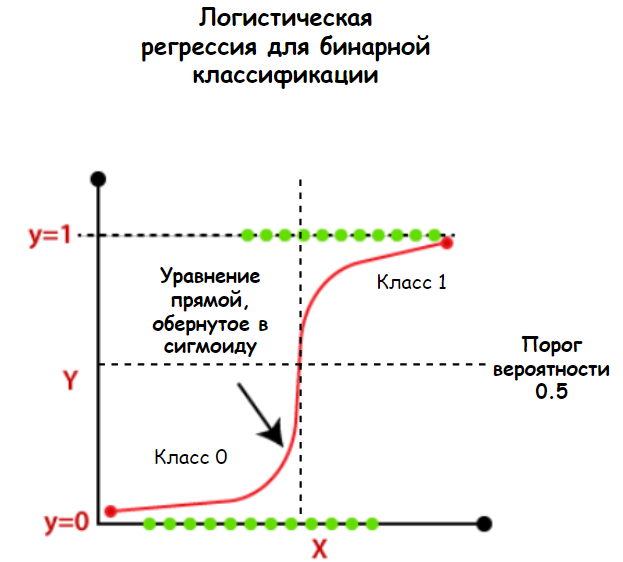

Математически подстановка в уравнение плоскости точки, которая не принадлежит ей (находится ниже или выше), означает вычисление расстояния от этой точки до плоскости.

* Если точка находится ниже плоскости, расстояние будет отрицательным (z < 0).
* Если точка находится выше плоскости, расстояние будет положительным (z > 0).
* Если точка находится на самой плоскости, z = 0.

Таким образом, ключевым моментом в предсказании логистической регрессии является расстояние от точки до разделяющей плоскости в пространстве факторов. Это расстояние в литературе часто называется отступом (margin). 

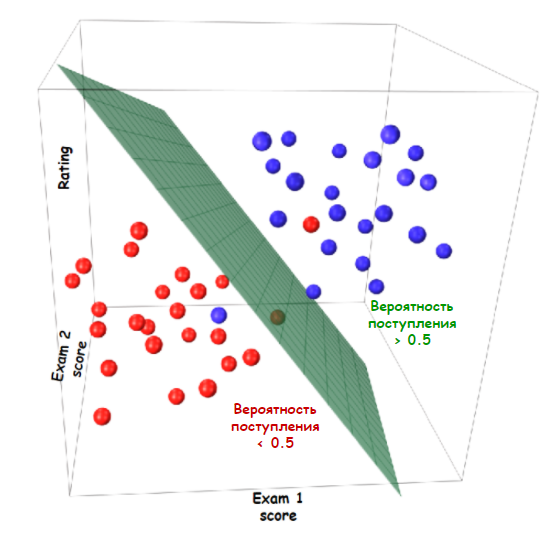

В общем случае, когда у нас есть зависимость от m факторов, линейное выражение, находящееся под сигмоидой, будет обозначать разделяющую гиперплоскость

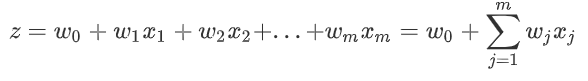

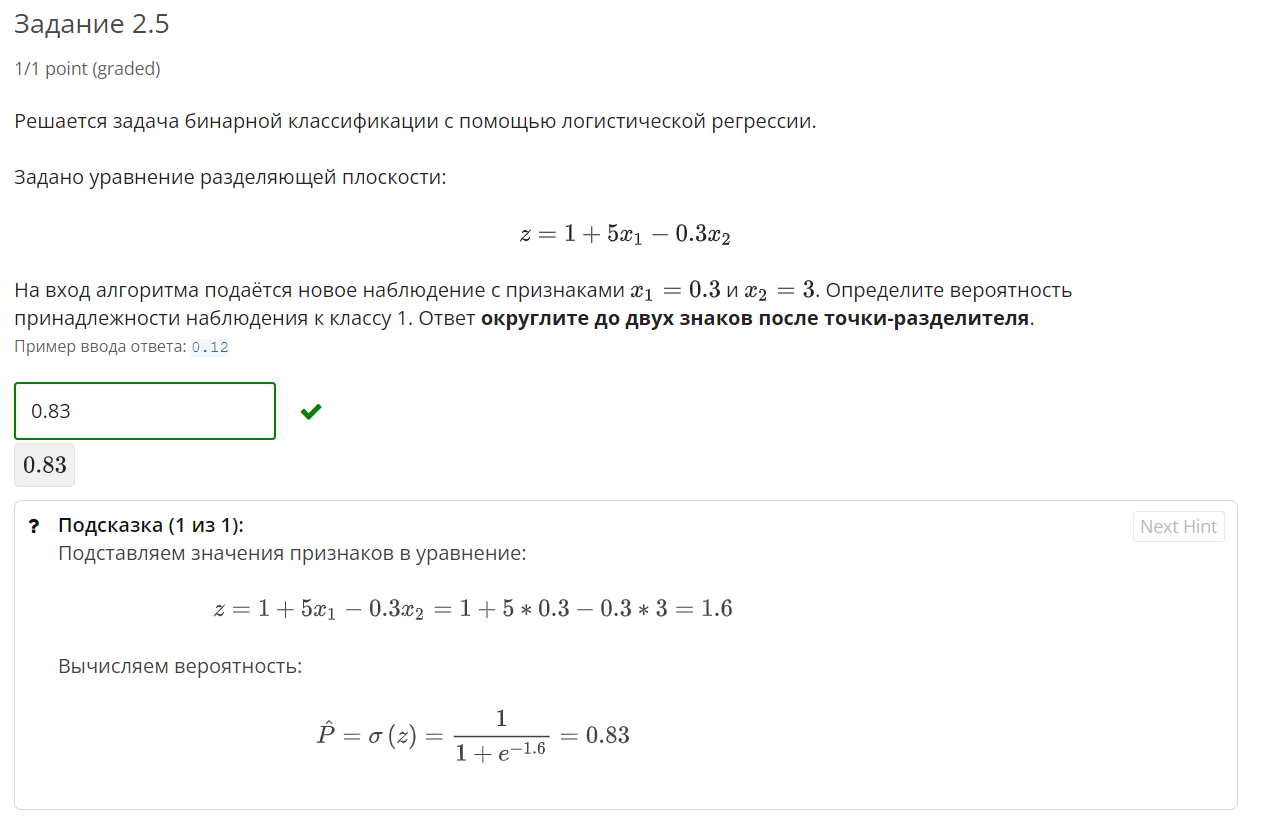

e = 2,71828182845

# ПОИСК ПАРАМЕТРОВ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

Как найти такие коэффициенты w = (w0, w1, w2...wm), чтобы гиперплоскость разделяла пространство наилучшим образом?

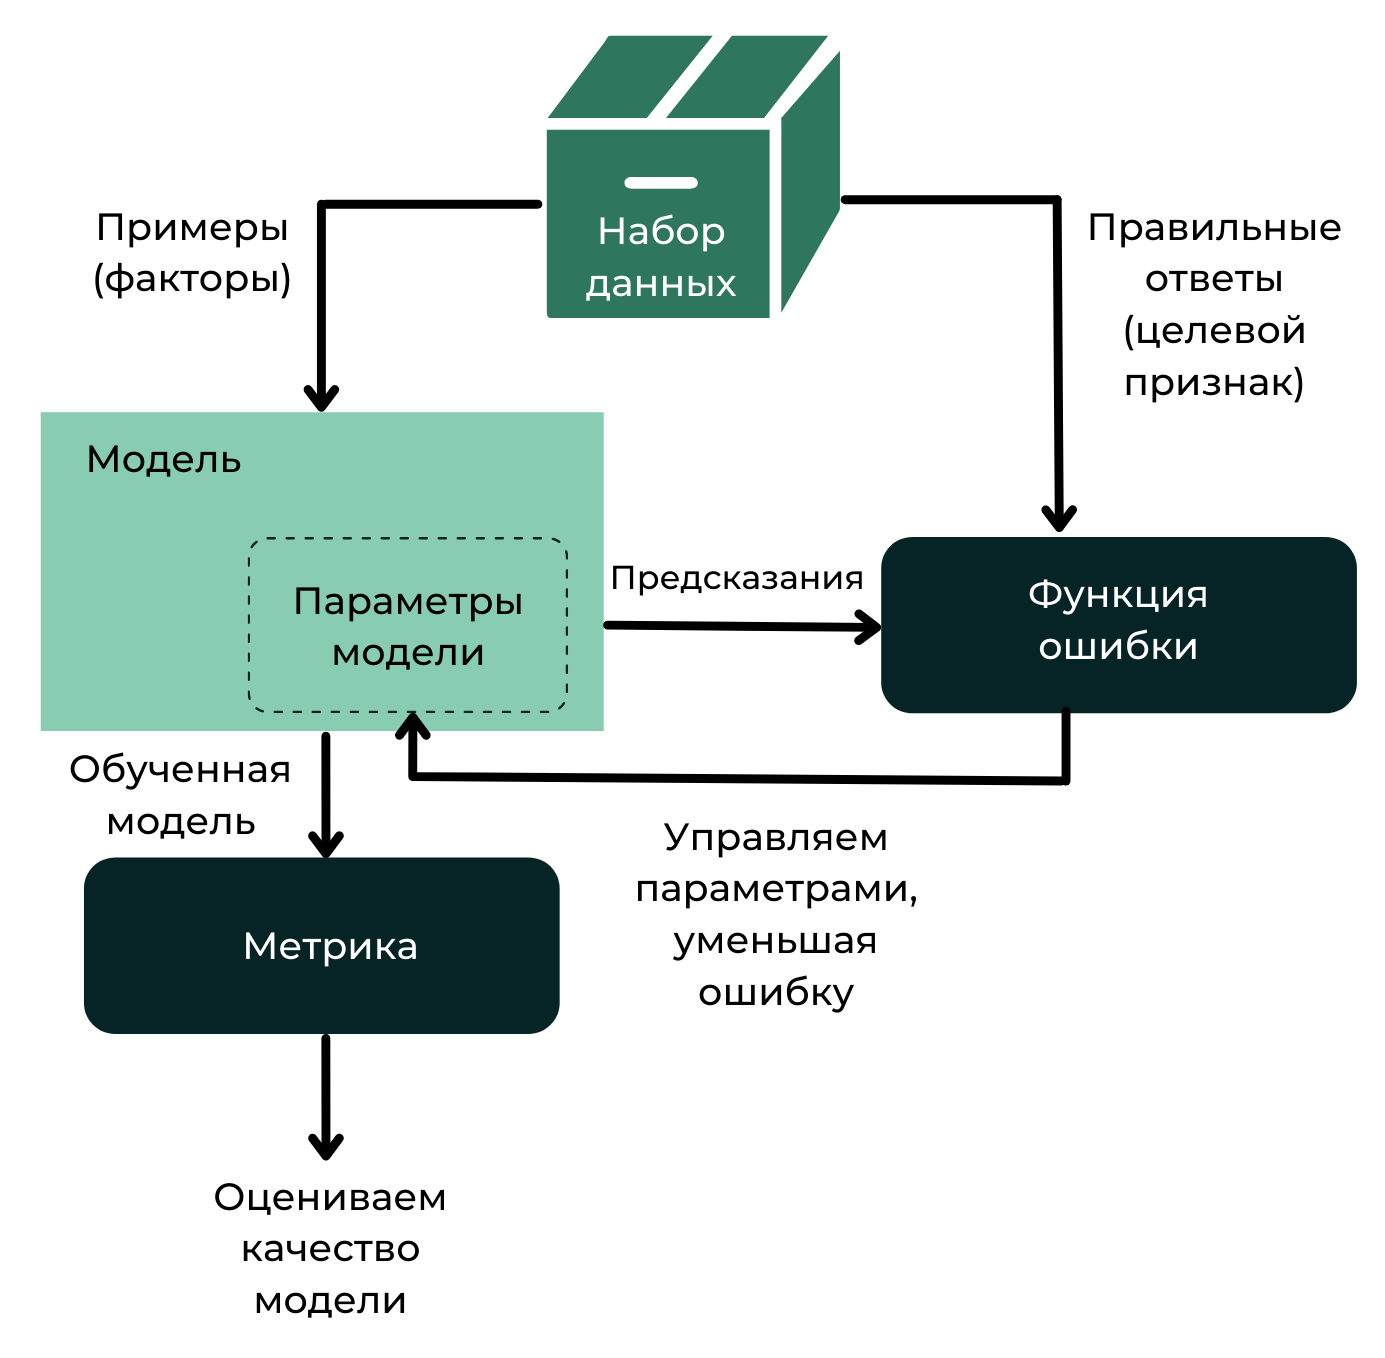

метод максимального правдоподобия (Maximum Likelihood Estimation — MLE). 

Правдоподобие — это оценка того, насколько вероятно получить истинное значение целевой переменной y при данных x и параметрах w. 

Цель метода — найти такие параметры w=(w1, w2, w3...wm), в которых наблюдается максимум функции правдоподобия. Подробнее о выводе формулы вы можете прочитать [здесь](https://habr.com/ru/articles/485872/).

Конечная формула:

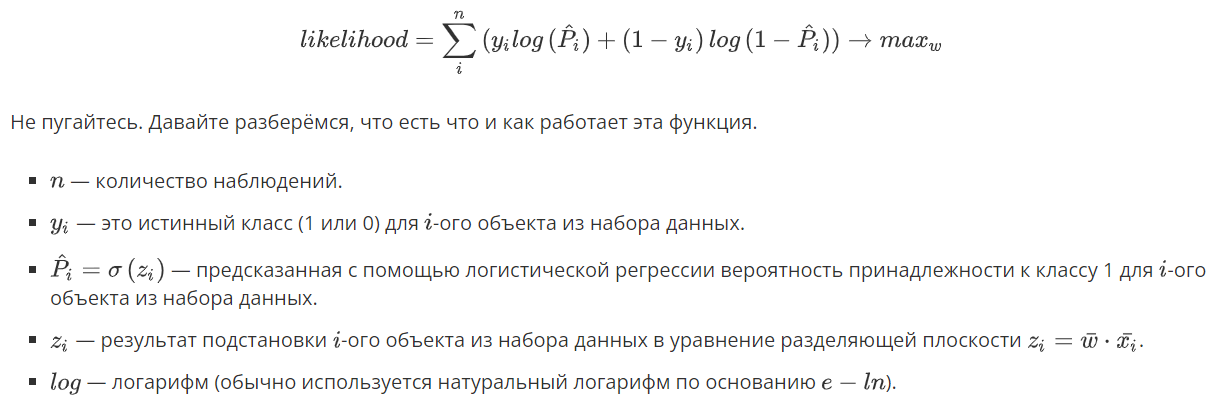

Примечание. К сожалению, функция likelihood не имеет интерпретации, то есть нельзя сказать, что значит число -2.34 в контексте правдоподобия.

Цель — найти такие параметры, при которых наблюдается максимум этой функции.

L(w) которая носит название «функция логистических потерь», или logloss. Также часто можно встретить название кросс-энтропия, или cross-entropy loss:

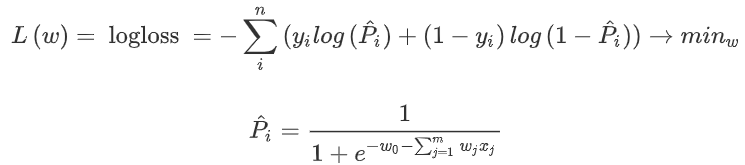

Вот эту функцию мы и будем минимизировать в рамках поиска параметров логистической регрессии. Мы должны найти такие параметры разделяющей плоскости w, при которых наблюдается минимум logloss.

Аналетически данная задача не регшается (поиск параметров), но можно решить например методом гралиентного спуска.

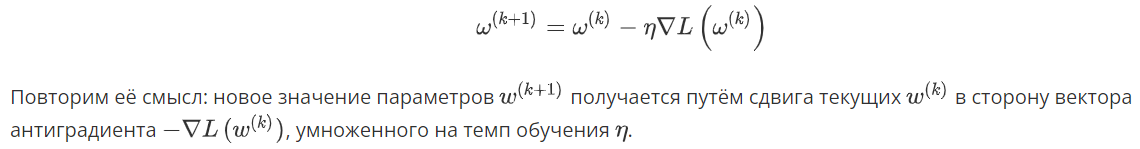

Во избежание переобучения модели в функцию потерь логистической регрессии традиционно добавляется регуляризация. В реализации логистической регрессии в sklearn она немного отличается от той, что мы видели ранее для линейной регрессии.

При L1-регуляризации мы добавляем в функцию потерь L(w) штраф из суммы модулей параметров, а саму функцию logloss умножаем на коэффициент C:

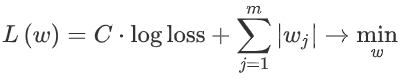

А при L2-регуляризации — штраф из суммы квадратов параметров:

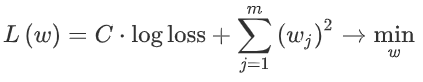

Значение коэффициента C — коэффициент, обратный коэффициенту регуляризации. Чем больше C, тем меньше «сила» регуляризации.



Из метода наименьших квадратов выводится функция ошибки для линейной регрессии, а не логистической.

Уравнение Беллмана используется в обучении с подкреплением, к логистической регрессии оно не имеет отношения.

Неверно:Средний квадрат ошибки используется в задачах регрессии как функция потерь.

Логистическая функция потерь используется в задачах классификации, в том числе и для поиска параметров логистической регрессии.

Средняя абсолютная ошибка используется в задачах регрессии.

Достоверность — это метрика классификации, а не функция ошибки.



Далее в нотбуке ML-3._Логистическая_регрессия

2.9

Таблица состоит из трёх столбцов:

* X_1 и X_2 — факторы;
* y — целевой признак.

Обучите модель логистической регрессии для предсказания целевого признака y. В качестве алгоритма оптимизации используйте стохастический градиентный спуск (масштабировать данные не нужно). В качестве значения параметра random_state возьмите число 42, остальные параметры оставьте по умолчанию.

Воспользуйтесь функцией plot_probabilities_2d(), которую мы объявили ранее. Постройте визуализацию разделяющей поверхности.

Сколько объектов класса 0 будут неверно отнесены моделью к классу 1?

In [34]:
import pandas as pd

df = pd.read_csv('data/task_data.csv')

In [2]:
df.head()

,SNo,X_1,X_2,y
0,0,-0.869144,0.389310,0.0
1,1,-0.993467,-0.610591,0.0
2,2,-0.834064,0.239236,0.0
3,3,-0.136471,0.632003,1.0
4,4,0.403887,0.310784,1.0


In [38]:
from sklearn import metrics
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

In [35]:
df = df.drop('SNo', axis=1)
#Составляем список факторов (исключили целевой столбец)
features = df.drop('y', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = df[features]
y = df['y']
 
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.LogisticRegression(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
sgd_lr_full.fit(X, y)

LogisticRegression(random_state=42)

In [36]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции - два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказывает вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линия, где вероятность равна 0.5.
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

c:\Users\Пользователь\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


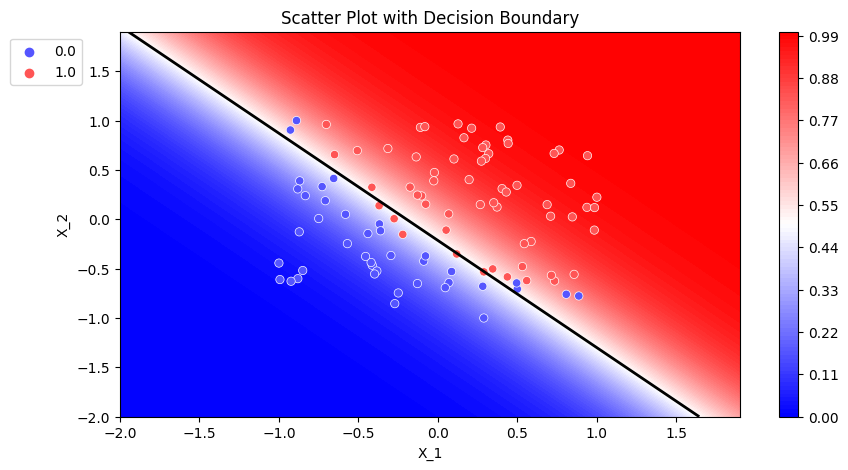

In [39]:
plot_probabilities_2d(X, y, sgd_lr_full)

Использовали просто логистическую регрессию, хотя нужно было стохастический градиентный спуск (SGDClassifier или SGDRegressor), использование SGDClassifier(loss='log') результатов в логистической регрессии, т. Е. Модель, эквивалент LogisticRegression которой подбирается через SGD, а не подгоняется одним из других решателей в LogisticRegression. Точно так же SGDRegressor(loss=’squared_loss’, penalty=’l2′) и Ridge решают одну и ту же задачу оптимизации разными способами.